In [1]:
import os
import numpy as np
import random
import glob
import math
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
%matplotlib widget

In [3]:
plt.style.use("bmh")

# -- set grayscale to be the default color map 
# plt.rcParams["image.cmap"] = "gist_gray"
plt.rcParams["axes.grid"] = False
plt.rcParams["figure.figsize"] = (15, 8)
plt.rcParams['axes.titlepad'] = 0 

In [4]:
# def create_source_locations(bimg, seed):
#     """
#     Create locations for sources
#     """

#     # -- seed the random number generators
#     np.random.seed(seed)
    
#     # -- get the code for each building 
#     bcodes = np.unique(bimg)

#     # -- initialize location lists/arrays
#     location = []
    
#     # -- since code == 0 represents the background, we start from 1
#     for i, bcode in enumerate(bcodes):

#         # -- ignore background
#         if bcode == 0:
#             continue
        
#         # -- alert the user
#         if (i + 1) % 100 == 0:
#             print("working on {0} of {1}\r".format(i + 1, len(bcodes)), end="")
        
#         # -- get pixels' location for each building (ind[0] is the row value and ind[1] is the col value)
#         ind = np.where(bimg == bcode)
    
#         # -- get locations for selected sources
#         loc = np.array(ind).T
    
#         # -- shuffle it
#         np.random.shuffle(loc)
    
#         # -- select sources for every 100 pixels
#         pix_loc = loc[::100]
    
#         location.append(np.array(pix_loc)) 
    
#     return np.concatenate(location)

In [5]:
# def create_timeseries(nsrc, ntimesteps, seed):
#     """
#     Create simulated time series.
#     """
    
#     # -- seed the random number generators
#     np.random.seed(seed)

#     # -- initialize time series lists/arrays
#     srcs = []
#     src_tmp = np.zeros(ntimesteps)
        
#     # -- add brightness for each source
#     for j in range(nsrc):

#         # -- alert the user
#         if (j + 1) % 100 == 0:
#             print("working on {0} of {1}\r".format(j + 1, nsrc), end="")
        
#         # -- we assume that each source will turn on and off no more than 10 times a night
#         # -- generate a random number for lights on
#         n_ons = np.random.randint(1, 10)
 
#         # -- add brightness for each "on" period
#         for jj in range(0, n_ons):
            
#             # -- pick a random start point (0-1800), which is 9pm to 2am
#             st = np.random.randint(0, 1800)
            
#             # -- the length of turning on the lights is between 10 mins to 1hours
#             en = st + np.random.randint(60, 360)
                        
#             # -- generate random brightness value to my list
#             on_lum = round(np.random.uniform(0.1, 1.0), 2)

#             # -- add this to the source
#             src_tmp[st:en] += on_lum
            
#         # -- append to source list
#         srcs.append(src_tmp.copy())
            
#         # -- re-zero source
#         src_tmp[:] = 0.0
    
#     return np.array(srcs)

In [6]:
# # -- create light sources for a month
# seed_loc = 315
# seed_ts = 964

# # -- set number of time steps (9 hours assuming 10 seconds / image )
# ntsteps = 6 * 60 * 9

# for i in range(30):
    
#     seed_ts = seed_ts + 1
    
#     # -- get the locations
#     loc_fname = "../../lighting-tech-changeover/output/simulation_month/img_simu_loc_{0:06}.npy".format(seed_loc)

#     if os.path.isfile(loc_fname):
#         loc = np.load(loc_fname)
#     else:
#         print(loc_fname + " not found... creating source locations")
#         loc = create_source_locations(bimg, seed_loc)
#         np.save(loc_fname, loc)

#     # -- get the corresponding time series
#     ts_fname = "../../lighting-tech-changeover/output/simulation_month/img_simu_src_curve_{0:06}.npy".format(seed_ts)

#     if os.path.isfile(ts_fname):
#         srcs = np.load(ts_fname)
#     else:
#         print(ts_fname + " not found... creating source times series")
#         srcs = create_timeseries(len(loc), ntsteps, seed_ts)
#         np.save(ts_fname, srcs)
    
               
    

In [ ]:
# -- I would like to create 30 days light curve for the buildingID "1008310042"
# -- so the first time is to create timeseries lc for the whole image

In [9]:
# seed_loc = 315
# # -- get the locations
# loc_fname = "../../lighting-tech-changeover/output/simulation_month/img_simu_loc_{0:06}.npy".format(seed_loc)


# -- read in building ID image
# bimg = np.load("../../Downloads/bbls_test.npy")

# def create_bin_img(srcs):
    


#     # -- duplicate each light curve by nine times
#     src0 = np.repeat(srcs, repeats=9, axis=0)

#     # -- get full list of source location
#     loc_new = []
#     for i in range(len(loc)):
#         loc0 = (loc[i][0] + 1, loc[i][1])
#         loc1 = (loc[i][0] - 1, loc[i][1])
#         loc2 = (loc[i][0], loc[i][1])
#         loc3 = (loc[i][0], loc[i][1] + 1)
#         loc4 = (loc[i][0], loc[i][1] - 1)
#         loc5 = (loc[i][0] - 1, loc[i][1] - 1)
#         loc6 = (loc[i][0] - 1, loc[i][1] + 1)
#         loc7 = (loc[i][0] + 1, loc[i][1] - 1)
#         loc8 = (loc[i][0] + 1, loc[i][1] + 1)
    
    
#         loc_new.append(loc0)
#         loc_new.append(loc1)
#         loc_new.append(loc2)
#         loc_new.append(loc3)
#         loc_new.append(loc4)
#         loc_new.append(loc5)
#         loc_new.append(loc6)
#         loc_new.append(loc7)
#         loc_new.append(loc8)

#     # -- add sources curve to time series images (try/except to handle boundaries)
#     t0 = time.time()
#     imgs = np.zeros((2560, 1920, 3240))
#     print(time.time() - t0)
#     for i in range(len(loc_new)):
#         try:
#             imgs[loc_new[i][0], loc_new[i][1], :] = src0[i]
#         except:
#             continue

    
#     return imgs

In [ ]:
# -- then create light curve for the buildingID "1008310042"

In [10]:
#     seed_ts = 994
#     seed_noise = 370

    
    
#     # -- get the corresponding time series
#     ts_fname = "../../lighting-tech-changeover/output/simulation_month/img_simu_src_curve_{0:06}.npy".format(seed_ts)
#     srcs = np.load(ts_fname)
    
#     imgs = create_bin_img(srcs)

#     # -- add noise to the image
#     sh = imgs.shape
    
# #     seed_noise = seed_noise+1
#     avg = 0
#     sigma = 0.01

#     np.random.seed(seed_noise)

#     # -- add noise to binned image
#     for i in range(3240):
    
#         imgs[:, :, i] = imgs[:, :, i] + \
#             np.random.normal(avg, sigma, (sh[0], sh[1]))

#     # -- get selected builing's source
#     ind = np.where(bimg == 1008310042)
#     buid_loc = np.array([ind[0],ind[1]]).T   

#     src_lc = []
#     for i in range(len(buid_loc)):
#         lc = imgs[buid_loc[i][0], buid_loc[i][1], :]
#         src_lc.append(lc)


#     np.save("../../lighting-tech-changeover/output/src_month_build/src_curve_month{0:06}.npy".format(seed_ts), src_lc)

1.33514404296875e-05


In [4]:
# -- test this for a given building

In [8]:
# -- append spec 
import glob
flist = sorted(glob.glob("../../lighting-tech-changeover/output/src_month_build/src_curve_month*.npy"))

In [9]:
# -- so let's actually fit this data by importing
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [10]:
# -- generate data with outages

def training_data(start, end,num):
    
    x_train = []
    y_train = []
    
    # -- load src for a given day
    src = np.load(flist[num]).mean(axis=0)
    
    # -- turn off the lights between start and end time
    src[start:end] = 0
    
    # -- standardize the data
    # -- for brightness
    src_st = (src - src.mean()) / src.std()
    # -- for timestamps
    dtime = np.array(list(range(len(src_st))))
    x_train = (dtime - dtime.mean()) / dtime.std()
    
    y_train = np.array(src_st)
    
    return x_train, y_train

        
                
        

In [44]:
def gaussian_pred(num):
    
    
    # -- get mean brightness of this building
    x_train, y_train = training_data(360, 720, num)

    
    # -- create a Gaussian process model
#     kernel = C(1.0) * RBF(1)
    gpr = GaussianProcessRegressor( random_state=0)
    
    # -- modeling and prediction
    pred_st = []
    for i in range(len(x_train)):
        
        # -- fit the GP model
        gpr.fit(x_train[i:89+i].reshape(-1, 1), y_train[i:89+i])
        
        # -- predict 
        if 90+i < len(x_train):
            pred, sigma = gpr.predict(x_train[90+i].reshape(-1, 1), return_std=True)
            pred_st.append(pred)
            
    pred_st = np.concatenate(pred_st)
            
    return pred_st, sigma, x_train, y_train
    

In [45]:
pred_st, sigma, x_train, y_train = gaussian_pred(0)

In [46]:
sigma

array([4.7880981e-06])

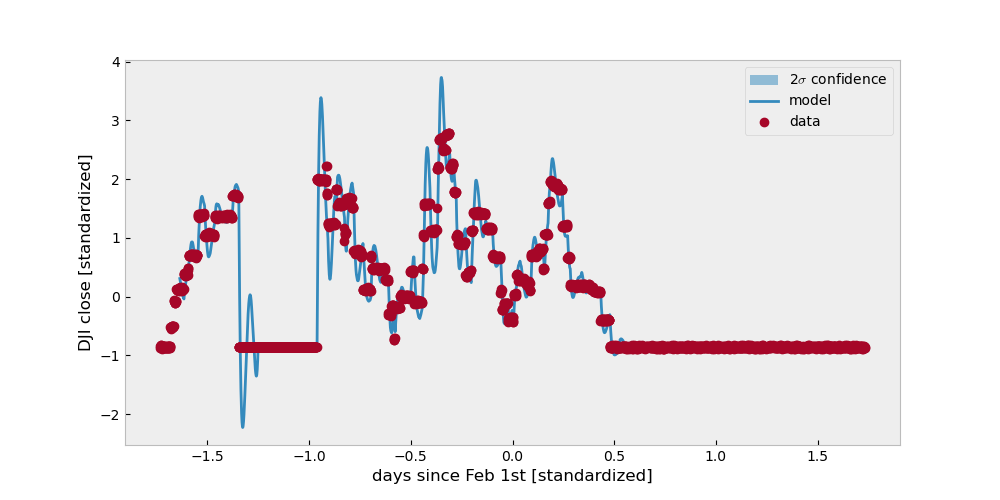

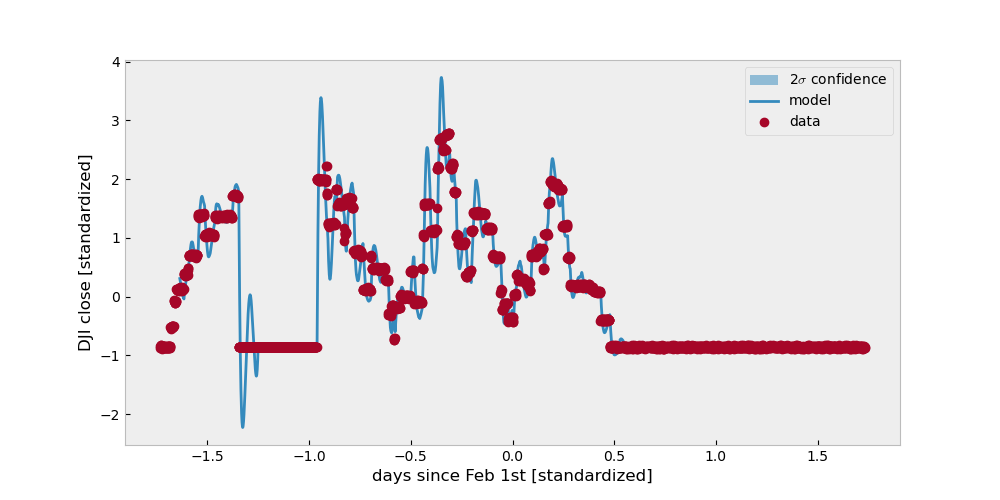

In [47]:
# -- plot the result
fig, ax = plt.subplots(figsize=[10, 5])
ax.fill_between(x_train[90:], pred_st + 1.96 * sigma, pred_st - 1.96 * sigma, alpha=0.5, label="2$\sigma$ confidence")
ax.plot(x_train[90:], pred_st, label="model")
ax.plot(x_train, y_train, "o", label="data")
ax.set_xlabel("days since Feb 1st [standardized]")
ax.set_ylabel("DJI close [standardized]")
ax.legend()
fig.show()

In [ ]:
# -- test it for a given bin

In [ ]:
flist_bin = sorted(glob.glob("../../lighting-tech-changeover/output/simulation_month/img_simu_*.npy"))